# Proyecto integrador


#### Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import csv
import plotly.graph_objects as go
from scipy.linalg import norm
from scipy.stats import norm
from collections import Counter
from numpy.linalg import norm

#### Limpieza de texto

In [2]:
import re
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#### Reducción de dimensionalidad y modelos

In [3]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

### Lectura de documentos

#### Textos

In [4]:
df = pd.read_csv('pdf_texts.csv', header=0)
df = df.sort_values(by='Title')
df.head(5)

,Title,Text
38,001_APPLE INC 10-K 20221028 aapl-20220924.htm,UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...
40,002_MICROSOFT CORP 10-K 2022728 msft-10k_20220...,\nUNITED STATES\nSECURITIES AND EXCHANGE COMM...
23,003_ALPHABET INC-CL A 10-K 2023203 goog-202212...,UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...
0,004_AMAZON.COM INC 10-K 2023203 amzn-20221231.htm,Table of Contents\nUNITED STATES\nSECURITIES A...
29,005_BERKSHIRE HATHAWAY INC-CL A 10-K 2023227 b...,\nUNITED STATES\nSECURITIES AND EXCHANGE COM...


#### Labels

In [6]:
labels = pd.read_csv('RawDataSet.csv', delimiter=';', header=0)
labels.head(5)
df = pd.concat([df["Title"],df['Text'], labels['Desempeño']], axis=1)

#### Embeddings

In [7]:
# Aquí se cargan los embeddings previamente calculados
embeddings_data = np.load('embeddings.npy')

## Tokenizacion y limpieza de texto

In [ ]:
df["tokens"] = df['Text'].apply(nltk.word_tokenize)
df.head(5)

,Title,Text,Desempeño,tokens
38,001_APPLE INC 10-K 20221028 aapl-20220924.htm,UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...,BUENO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."
40,002_MICROSOFT CORP 10-K 2022728 msft-10k_20220...,\nUNITED STATES\nSECURITIES AND EXCHANGE COMM...,BUENO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."
23,003_ALPHABET INC-CL A 10-K 2023203 goog-202212...,UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...,BUENO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."
0,004_AMAZON.COM INC 10-K 2023203 amzn-20221231.htm,Table of Contents\nUNITED STATES\nSECURITIES A...,BUENO,"[Table, of, Contents, UNITED, STATES, SECURITI..."
29,005_BERKSHIRE HATHAWAY INC-CL A 10-K 2023227 b...,\nUNITED STATES\nSECURITIES AND EXCHANGE COM...,MALO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."


### Eliminar palabras raras y links

In [ ]:
english_words = set(words.words())

def clean_tokens(token_list):
    cleaned_tokens = []
    for token in token_list:
        # Remover URLs
        token = re.sub(r'http\S+', '', token)
        # Conservar palabras con letras y números, y remover todo lo demás
        if re.match('^[A-Za-z0-9]+$', token):
            # Chequear si la palabra está en la lista de palabras en inglés
            if token.lower() in english_words:
                cleaned_tokens.append(token)
    return cleaned_tokens

# Aplicar la limpieza a cada conjunto de tokens en el DataFrame
df['cleaned_tokens'] = df['tokens'].apply(clean_tokens)
df.head(5)

,Title,Text,Desempeño,tokens,cleaned_tokens
38,001_APPLE INC 10-K 20221028 aapl-20220924.htm,UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...,BUENO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...","[UNITED, AND, EXCHANGE, COMMISSION, FORM, Mark..."
40,002_MICROSOFT CORP 10-K 2022728 msft-10k_20220...,\nUNITED STATES\nSECURITIES AND EXCHANGE COMM...,BUENO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...","[UNITED, AND, EXCHANGE, COMMISSION, FORM, ANNU..."
23,003_ALPHABET INC-CL A 10-K 2023203 goog-202212...,UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...,BUENO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...","[UNITED, AND, EXCHANGE, COMMISSION, FORM, Mark..."
0,004_AMAZON.COM INC 10-K 2023203 amzn-20221231.htm,Table of Contents\nUNITED STATES\nSECURITIES A...,BUENO,"[Table, of, Contents, UNITED, STATES, SECURITI...","[Table, of, Contents, UNITED, AND, EXCHANGE, C..."
29,005_BERKSHIRE HATHAWAY INC-CL A 10-K 2023227 b...,\nUNITED STATES\nSECURITIES AND EXCHANGE COM...,MALO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...","[UNITED, AND, EXCHANGE, COMMISSION, FORM, ANNU..."


### Stopwords

In [ ]:
#Importación de stop words
stop_words_nltk_en = set(stopwords.words('english'))
print(len(stop_words_nltk_en))
print(stop_words_nltk_en)

179
{'me', 'at', 'this', 'more', 'if', 'we', 'until', 'weren', 'both', 'over', 'hadn', 'do', 'very', 'is', "she's", 'd', "haven't", 'hers', 'should', 'with', 'been', 'when', 'itself', 'and', 'off', 'be', 'my', 'they', 're', 'up', "aren't", 'just', 'ain', 'again', 'too', 'so', 'on', 'myself', 'below', 'here', 'whom', 'doesn', 'from', "won't", "hadn't", 'were', 'in', 'himself', 'ma', 'shan', 'i', 'into', 'no', 'nor', "couldn't", 'because', 'most', "needn't", 'shouldn', 'she', 'who', "shouldn't", "you've", "hasn't", 'what', 'doing', 'against', 'yours', 'above', 'once', 'isn', 'an', 'under', 'those', 'now', 'ourselves', 'mustn', 'it', 'their', 'some', 'herself', 'while', 'which', 'our', 'needn', 'down', "it's", 'not', 'as', 'you', 'after', 'that', "weren't", 'each', 'are', 'yourself', "shan't", "you'll", 'between', 'for', 'there', "you're", 'him', 'have', 'having', 'of', 'any', 've', 'haven', 'themselves', 'other', 't', 'why', 'was', 'has', 'm', 'own', 'don', 'them', 'am', "mightn't", 'all

In [ ]:
# Filtrar las stopwords de los tokens y convertir a minúsculas
df['clean_tokens_sw'] = df['cleaned_tokens'].apply(
    lambda x: [word.lower() for word in x if word.lower() not in stop_words_nltk_en]
)
df.head(5)

,Title,Text,Desempeño,tokens,cleaned_tokens,clean_tokens_sw
38,001_APPLE INC 10-K 20221028 aapl-20220924.htm,UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...,BUENO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...","[UNITED, AND, EXCHANGE, COMMISSION, FORM, Mark...","[united, exchange, commission, form, mark, one..."
40,002_MICROSOFT CORP 10-K 2022728 msft-10k_20220...,\nUNITED STATES\nSECURITIES AND EXCHANGE COMM...,BUENO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...","[UNITED, AND, EXCHANGE, COMMISSION, FORM, ANNU...","[united, exchange, commission, form, annual, r..."
23,003_ALPHABET INC-CL A 10-K 2023203 goog-202212...,UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...,BUENO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...","[UNITED, AND, EXCHANGE, COMMISSION, FORM, Mark...","[united, exchange, commission, form, mark, one..."
0,004_AMAZON.COM INC 10-K 2023203 amzn-20221231.htm,Table of Contents\nUNITED STATES\nSECURITIES A...,BUENO,"[Table, of, Contents, UNITED, STATES, SECURITI...","[Table, of, Contents, UNITED, AND, EXCHANGE, C...","[table, contents, united, exchange, commission..."
29,005_BERKSHIRE HATHAWAY INC-CL A 10-K 2023227 b...,\nUNITED STATES\nSECURITIES AND EXCHANGE COM...,MALO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...","[UNITED, AND, EXCHANGE, COMMISSION, FORM, ANNU...","[united, exchange, commission, form, annual, r..."


### Lemmatization y stemming

In [ ]:
# Se aplica la lematización y Stemming como funciones lambda
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

df['tokens_stemmed'] = df['clean_tokens_sw'].apply(lambda x: [stemmer.stem(word) for word in x])
df['tokens_lemmatized'] = df['clean_tokens_sw'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head(5)

,Title,Text,Desempeño,tokens,cleaned_tokens,clean_tokens_sw,tokens_stemmed,tokens_lemmatized
38,001_APPLE INC 10-K 20221028 aapl-20220924.htm,UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...,BUENO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...","[UNITED, AND, EXCHANGE, COMMISSION, FORM, Mark...","[united, exchange, commission, form, mark, one...","[unit, exchang, commiss, form, mark, one, al, ...","[united, exchange, commission, form, mark, one..."
40,002_MICROSOFT CORP 10-K 2022728 msft-10k_20220...,\nUNITED STATES\nSECURITIES AND EXCHANGE COMM...,BUENO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...","[UNITED, AND, EXCHANGE, COMMISSION, FORM, ANNU...","[united, exchange, commission, form, annual, r...","[unit, exchang, commiss, form, annual, report,...","[united, exchange, commission, form, annual, r..."
23,003_ALPHABET INC-CL A 10-K 2023203 goog-202212...,UNITED STATES\nSECURITIES AND EXCHANGE COMMISS...,BUENO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...","[UNITED, AND, EXCHANGE, COMMISSION, FORM, Mark...","[united, exchange, commission, form, mark, one...","[unit, exchang, commiss, form, mark, one, al, ...","[united, exchange, commission, form, mark, one..."
0,004_AMAZON.COM INC 10-K 2023203 amzn-20221231.htm,Table of Contents\nUNITED STATES\nSECURITIES A...,BUENO,"[Table, of, Contents, UNITED, STATES, SECURITI...","[Table, of, Contents, UNITED, AND, EXCHANGE, C...","[table, contents, united, exchange, commission...","[tabl, content, unit, exchang, commiss, form, ...","[table, content, united, exchange, commission,..."
29,005_BERKSHIRE HATHAWAY INC-CL A 10-K 2023227 b...,\nUNITED STATES\nSECURITIES AND EXCHANGE COM...,MALO,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...","[UNITED, AND, EXCHANGE, COMMISSION, FORM, ANNU...","[united, exchange, commission, form, annual, r...","[unit, exchang, commiss, form, annual, report,...","[united, exchange, commission, form, annual, r..."


### Frecuencia de palabras

In [ ]:
word_freq = Counter([word for sublist in df['tokens_lemmatized'] for word in sublist])

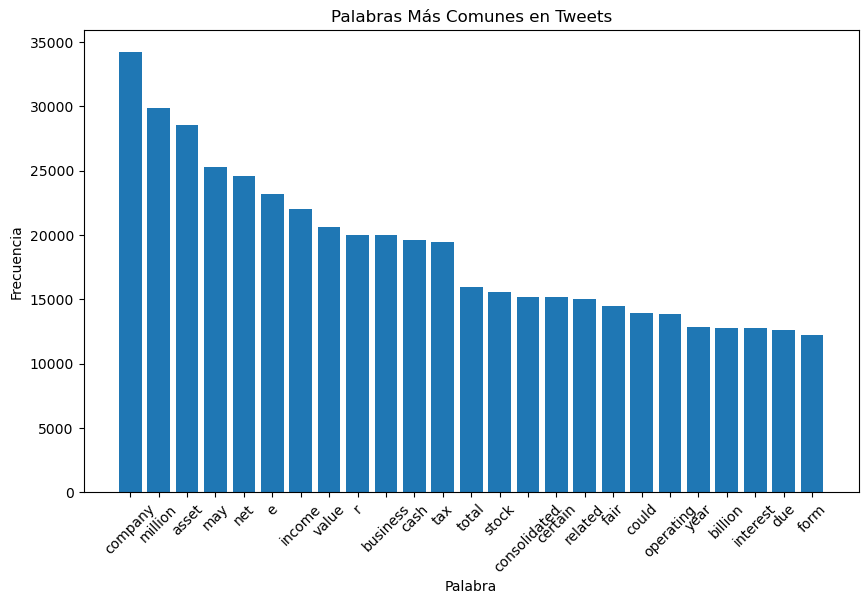

In [ ]:
# Palabras mas comunes
top_words = word_freq.most_common(25)

# Visualización de las palabras más comunes
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras Más Comunes en Tweets')
plt.xticks(rotation=45)
plt.show()

## Métodos de vectorización Aplicar : TF-IDF, BOW

### TF-IDF

In [ ]:
# Convertir la lista de listas en una lista de strings
lemmatized_texts_joined = [' '.join(text) for text in df["tokens_lemmatized"]]

# Crear una instancia de TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transformar los datos procesados en una matriz TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(lemmatized_texts_joined)

# Mostrar información sobre la matriz TF-IDF
print(f"Matriz TF-IDF creada con dimensiones {X_tfidf.shape}")

Matriz TF-IDF creada con dimensiones (110, 11922)


In [ ]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head(5)

,aa,abandon,abandoned,abandonment,abate,abatement,abb,abbas,abdomen,abdominal,...,zimbabwe,zinc,zip,zloty,zo,zoll,zone,zoning,zoom,zoster
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.001162,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.007554,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.001051,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.002696,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.003456,0.0,0.000000,0.0
4,0.003204,0.0,0.0,0.002978,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.002869,0.000803,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


## Analisis de componente PCA

### Componentes optimos

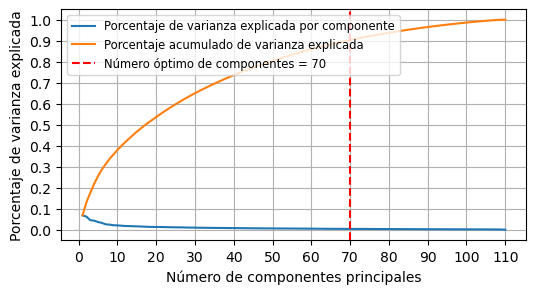

El número óptimo de componentes principales es: 70
La nueva matriz con los 70 componentes principales tiene forma: (110, 70)


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Umbral para el porcentaje acumulado de varianza explicada
umbral = 0.90

# Ajusta el PCA con todos los componentes
pca = PCA()
X_pca = pca.fit_transform(X_tfidf.toarray())

# Porcentaje de varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Porcentaje acumulado de varianza explicada
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Encuentra el número óptimo de componentes principales
n_componentes = np.argmax(cumulative_explained_variance >= umbral) + 1

# Ajusta el PCA con el número óptimo de componentes principales
pca_opt = PCA(n_components=n_componentes)
X_pca_opt = pca_opt.fit_transform(X_tfidf.toarray())

# Grafica el resultado
plt.figure(figsize=(6, 3))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Porcentaje de varianza explicada por componente')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, label='Porcentaje acumulado de varianza explicada')
plt.axvline(x=n_componentes, color='r', linestyle='--', label=f'Número óptimo de componentes = {n_componentes}')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.xticks(np.arange(0, len(explained_variance_ratio) + 1, 10))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.legend(loc='upper left', fontsize='small')
plt.show()

print(f"El número óptimo de componentes principales es: {n_componentes}")
print(f"La nueva matriz con los {n_componentes} componentes principales tiene forma: {X_pca_opt.shape}")

In [ ]:
#Convertimos la matriz tfidf a data frame para manipularla más fácil
features = pd.DataFrame(X_pca_opt)
#Verificamos que siga teniendo la misma estructura inicial
features.shape

(110, 70)

In [ ]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.546108,-0.165501,0.128060,-0.035359,-0.004112,-0.068386,-0.143411,0.025820,-0.004051,0.036485,...,-0.039863,-0.011674,0.083424,-0.077427,-0.035694,0.022710,-0.058898,0.020144,0.059680,0.043863
1,-0.143828,-0.059696,-0.139430,0.039665,-0.099691,-0.162529,-0.102733,-0.127372,-0.021180,0.062264,...,0.010626,-0.080664,-0.087517,-0.046603,-0.090318,0.105596,0.020557,0.020911,-0.037871,0.048256
2,-0.151786,0.010789,-0.103811,0.005571,-0.079658,-0.127982,-0.055913,-0.052657,-0.007096,0.065820,...,-0.041525,-0.040558,-0.012909,0.037691,0.018560,-0.004870,-0.036269,0.026975,-0.014211,-0.041306
3,-0.175606,-0.086798,-0.082803,-0.080836,-0.158357,-0.058785,-0.033225,0.033375,0.019471,0.021312,...,0.084336,0.064289,0.036169,-0.047692,0.042684,0.003173,0.031961,-0.035268,0.042382,0.039952
4,-0.104446,0.123734,0.105330,0.010355,0.005117,0.045496,0.154471,0.013850,0.104344,-0.029880,...,0.092637,-0.003258,0.061005,-0.014819,0.113271,-0.070558,0.022156,0.056198,-0.026228,-0.005352


In [ ]:
#Concatenamos los labels para la clasificación
features = pd.concat([features,labels['Desempeño']], axis=1)
features.head(5)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,Desempeño,Desempeño,Desempeño
0,0.546108,-0.165501,0.128060,-0.035359,-0.004112,-0.068386,-0.143411,0.025820,-0.004051,0.036485,...,-0.077427,-0.035694,0.022710,-0.058898,0.020144,0.059680,0.043863,BUENO,BUENO,BUENO
1,-0.143828,-0.059696,-0.139430,0.039665,-0.099691,-0.162529,-0.102733,-0.127372,-0.021180,0.062264,...,-0.046603,-0.090318,0.105596,0.020557,0.020911,-0.037871,0.048256,BUENO,BUENO,BUENO
2,-0.151786,0.010789,-0.103811,0.005571,-0.079658,-0.127982,-0.055913,-0.052657,-0.007096,0.065820,...,0.037691,0.018560,-0.004870,-0.036269,0.026975,-0.014211,-0.041306,BUENO,BUENO,BUENO
3,-0.175606,-0.086798,-0.082803,-0.080836,-0.158357,-0.058785,-0.033225,0.033375,0.019471,0.021312,...,-0.047692,0.042684,0.003173,0.031961,-0.035268,0.042382,0.039952,MALO,MALO,MALO
4,-0.104446,0.123734,0.105330,0.010355,0.005117,0.045496,0.154471,0.013850,0.104344,-0.029880,...,-0.014819,0.113271,-0.070558,0.022156,0.056198,-0.026228,-0.005352,MALO,MALO,MALO


### Reduccion de componentes con PCA

In [ ]:
X_dense = X_pca_opt

# Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)  # Reduciendo a 2 componentes para visualización
reduced_data = pca.fit_transform(X_dense)

# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(reduced_data, columns=['PCA Component 1', 'PCA Component 2'])
df_pca['Index'] = df_pca.index
df_pca['Document Title'] = df['Title']  # Utiliza los títulos directamente del DataFrame df

# Reordenar columnas para mejor lectura
df_pca = df_pca[['Index', 'Document Title', 'PCA Component 1', 'PCA Component 2']]

# Mostrar la tabla organizada
print(df_pca.to_string(index=False))

 Index                                                              Document Title  PCA Component 1  PCA Component 2
     0                           004_AMAZON.COM INC 10-K 2023203 amzn-20221231.htm         0.546108        -0.165501
     1                     041_TEXAS INSTRUMENTS INC 10-K 2023203 txn-20221231.htm        -0.143828        -0.059696
     2                         015_MASTERCARD INC - A 10-K 2023214 ma-20221231.htm        -0.151786         0.010789
     3        027_COSTCO WHOLESALE CORP Annual Report 2023411 SD000000003008351609        -0.175606        -0.086798
     4                                    055_AT_T INC 10-K 2023213 t-20221231.htm        -0.104446         0.123734
     5                           065_S_P GLOBAL INC 10-K 2023210 spgi-20221231.htm        -0.190039        -0.095881
     6                   051_BRISTOL-MYERS SQUIBB CO 10-K 2023214 bmy-20221231.htm        -0.160813         0.054863
     7                      061_LOCKHEED MARTIN CORP 10-K 202312

### Diagrama de dispersión para PCA

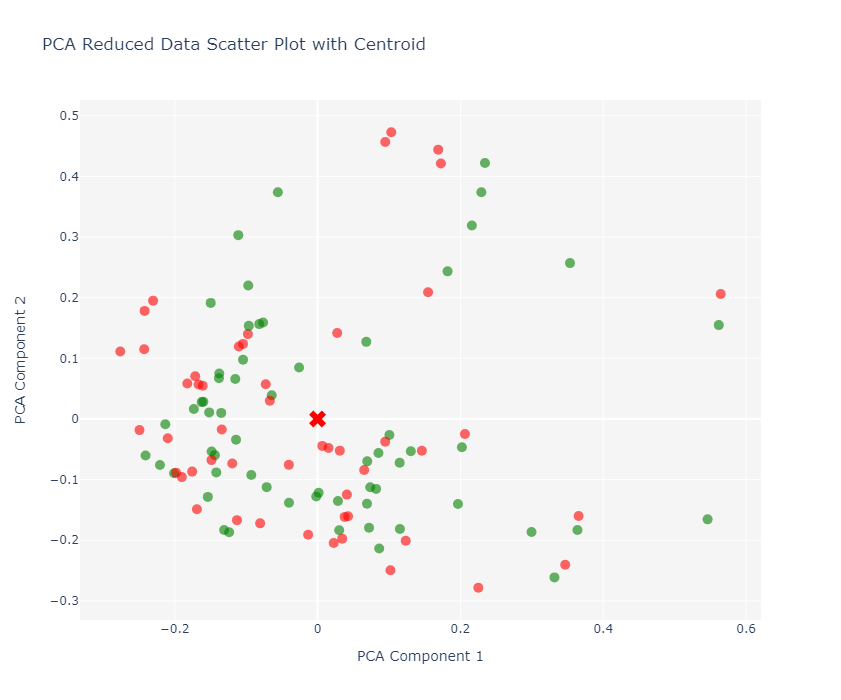

In [ ]:
# Convertir reduced_data a DataFrame para facilitar la concatenación
reduced_data_df = pd.DataFrame(reduced_data, columns=['PCA Component 1', 'PCA Component 2'])

# Concatenar la columna 'Desempeño' a reduced_data_df
reduced_data_df = pd.concat([reduced_data_df, labels['Desempeño']], axis=1)

# Calcular el centroide (sin incluir la columna 'Desempeño')
centroid = np.mean(reduced_data_df.iloc[:, :-1].values, axis=0)

# Definir los colores en función de 'Desempeño'
colors = reduced_data_df['Desempeño'].apply(lambda x: 'green' if x == 'BUENO' else 'red')

# Crear la figura
fig = go.Figure()

# Añadir los puntos de datos con colores en función de 'Desempeño'
fig.add_trace(go.Scatter(
    x=reduced_data_df.iloc[:, 0],
    y=reduced_data_df.iloc[:, 1],
    mode='markers',
    marker=dict(color=colors, size=10, opacity=0.6),
    text=df_pca['Index'],  # Añadir indices como etiquetas de los puntos
    hoverinfo='text+x+y'
))

# Añadir el centroide
fig.add_trace(go.Scatter(
    x=[centroid[0]],
    y=[centroid[1]],
    mode='markers',
    marker=dict(color='red', size=15, symbol='x'),
    text=['Centroide'],
    hoverinfo='text+x+y'
))

# Configurar el layout del gráfico
fig.update_layout(
    title='PCA Reduced Data Scatter Plot with Centroid',
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    plot_bgcolor='whitesmoke',
    showlegend=False,
    width=1000,
    height=700
)

# Mostrar la figura
fig.show()

## Distancia euclideana para PCA

### Formato tabla

In [ ]:
# Calcular el centroide de los datos reducidos
centroid = np.mean(reduced_data, axis=0)

# Calcular las distancias euclidianas de cada punto al centroide
distances = np.linalg.norm(reduced_data - centroid, axis=1)

# Crear DataFrame con títulos y distancias euclidianas al centroide
distance_df = pd.DataFrame({
    "index": range(110),
    'Title': df['Title'],
    'Euclidean Distance': distances
}).sort_values(by='index')

# Mostrar la tabla
print(distance_df.to_string(index=False))

 index                                                                       Title  Euclidean Distance
     0                               001_APPLE INC 10-K 20221028 aapl-20220924.htm            0.570635
     1                       002_MICROSOFT CORP 10-K 2022728 msft-10k_20220630.htm            0.155724
     2                        003_ALPHABET INC-CL A 10-K 2023203 goog-20221231.htm            0.152169
     3                           004_AMAZON.COM INC 10-K 2023203 amzn-20221231.htm            0.195886
     4              005_BERKSHIRE HATHAWAY INC-CL A 10-K 2023227 brka-20221231.htm            0.161923
     5                              006_NVIDIA CORP 10-K 2023224 nvda-20230129.htm            0.212856
     6                                007_TESLA INC 10-K 2023131 tsla-20221231.htm            0.169914
     7                    008_VISA INC-CLASS A SHARES 10-K 20221116 v-20220930.htm            0.144250
     8                          009_EXXON MOBIL CORP 10-K 2023222 xom-202

### Mapa de calor distancia euclideana

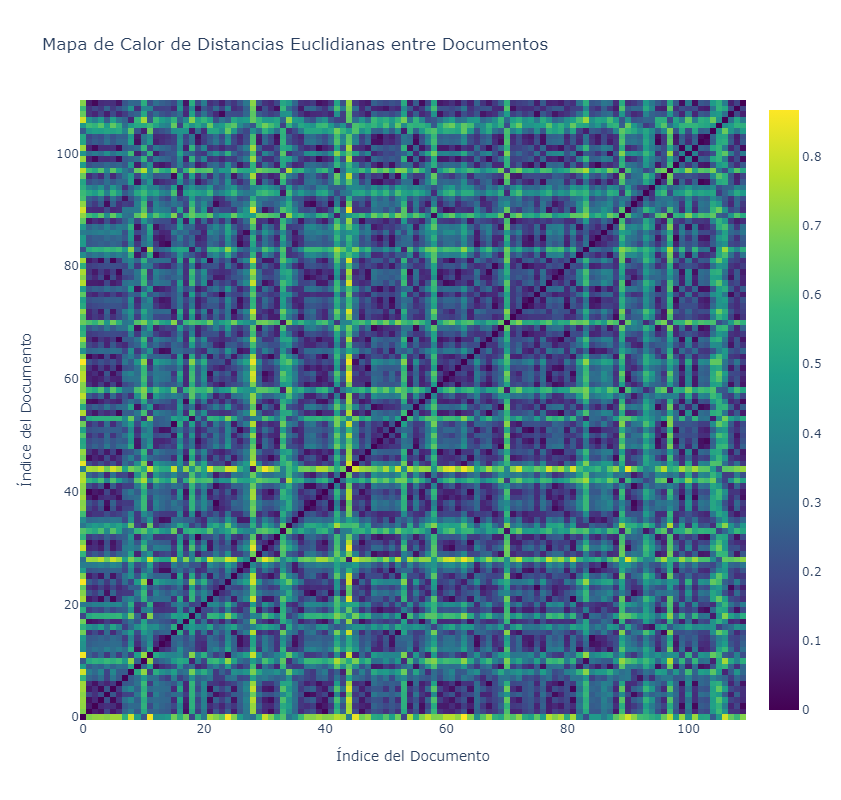

In [ ]:
# Calculamos la matriz de distancias euclidianas entre todos los pares de documentos
dist_matrix = np.linalg.norm(reduced_data[:, np.newaxis] - reduced_data, axis=2)

# Usar Plotly para crear un mapa de calor interactivo
fig = go.Figure(data=go.Heatmap(
    z=dist_matrix,
    x=np.arange(110),
    y=np.arange(110),
    colorscale='Viridis'
))

# Configurar el layout del gráfico
fig.update_layout(
    title='Mapa de Calor de Distancias Euclidianas entre Documentos',
    xaxis_title='Índice del Documento',
    yaxis_title='Índice del Documento',
    width=900,
    height=800
)

fig.show()

### Eliminacion de datos atipicos con distancia euclideana.

Se han eliminado 7 documentos como outliers:
Índice: 0, Título: 001_APPLE INC 10-K 20221028 aapl-20220924.htm
Índice: 28, Título: 029_MCDONALD_S CORP 10-K 2022224 mcd-20211231.htm
Índice: 42, Título: 043_NEXTERA ENERGY INC 10-K 2023217 nee-20221231.htm
Índice: 44, Título: 045_WELLS FARGO _ CO 10-K 2023221 wfc-20221231.htm
Índice: 70, Título: 071_GENERAL ELECTRIC CO 10-K 2023210 ge-20221231.htm
Índice: 89, Título: 090_CHUBB LTD 10-K 2023224 cb-20221231.htm
Índice: 97, Título: 098_DUKE ENERGY CORP 10-K 2023227 duk-20221231.htm


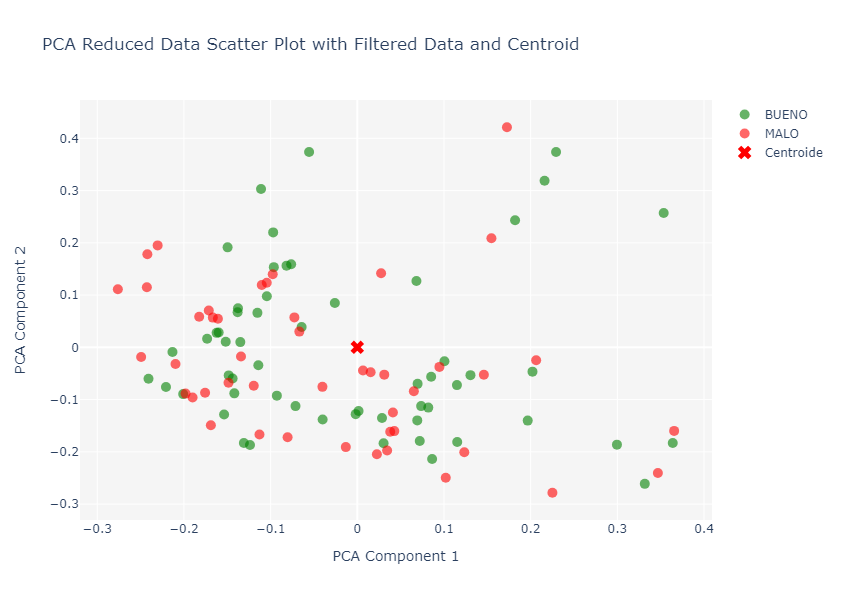

In [ ]:
# Calcular el centroide de los datos
centroid = np.mean(reduced_data, axis=0)

# Calcular la distancia euclidiana de cada punto al centroide
distances = norm(reduced_data - centroid, axis=1)

# Calcular la media y la desviación estándar de las distancias
mean_dist = np.mean(distances)
std_dist = np.std(distances)

# Definir un umbral para considerar un punto como outlier
threshold = mean_dist + 2 * std_dist

# Filtrar los datos para eliminar los outliers
filtered_indices = distances < threshold
filtered_data = reduced_data[filtered_indices]
filtered_titles = df['Title'][filtered_indices].tolist()

# Identificar y contar los outliers
outlier_indices = np.where(distances >= threshold)[0]  # Índices de los outliers
num_outliers = len(outlier_indices)  # Número de outliers

# Guardar los índices y títulos de los documentos eliminados como outliers en una lista
outliers_list = []
for idx in outlier_indices:
    outliers_list.append((idx, df['Title'].iloc[idx]))

# Mostrar la cantidad de documentos eliminados como outliers
print(f"Se han eliminado {num_outliers} documentos como outliers:")
for idx, title in outliers_list:
    print(f"Índice: {idx}, Título: {title}")

# Separar los datos filtrados por desempeño
filtered_labels = labels[filtered_indices]
filtered_data_bueno = filtered_data[filtered_labels['Desempeño'] == 'BUENO']
filtered_data_malo = filtered_data[filtered_labels['Desempeño'] == 'MALO']

# Crear la figura para graficar los datos filtrados
fig = go.Figure()

# Añadir los puntos de datos filtrados (BUENO)
fig.add_trace(go.Scatter(
    x=filtered_data_bueno[:, 0],
    y=filtered_data_bueno[:, 1],
    mode='markers',
    marker=dict(color='green', size=10, opacity=0.6),
    text=[f"Índice: {idx}" for idx in np.where(filtered_labels['Desempeño'] == 'BUENO')[0]],  # Añadir índices como etiquetas de los puntos
    hoverinfo='text+x+y',
    name='BUENO'
))

# Añadir los puntos de datos filtrados (MALO)
fig.add_trace(go.Scatter(
    x=filtered_data_malo[:, 0],
    y=filtered_data_malo[:, 1],
    mode='markers',
    marker=dict(color='red', size=10, opacity=0.6),
    text=[f"Índice: {idx}" for idx in np.where(filtered_labels['Desempeño'] == 'MALO')[0]],  # Añadir índices como etiquetas de los puntos
    hoverinfo='text+x+y',
    name='MALO'
))

# Añadir el centroide
fig.add_trace(go.Scatter(
    x=[centroid[0]],
    y=[centroid[1]],
    mode='markers',
    marker=dict(color='red', size=12, symbol='x'),
    name='Centroide',
    hoverinfo='name+x+y'
))

# Configurar el layout del gráfico
fig.update_layout(
    title='PCA Reduced Data Scatter Plot with Filtered Data and Centroid',
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    plot_bgcolor='whitesmoke',
    showlegend=True,
    width=800,
    height=600
)

fig.show()

## Modelos

In [ ]:
count = labels['Desempeño'].value_counts()['BUENO']
print(count)

60


In [ ]:
#Se crea un nuevo data frame para remover los documentos atípicos
features_models = features
# Verificar la estructura del DataFrame
print(features.shape)
features_models.head()

(110, 71)


,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,Desempeño
0,0.546108,-0.165501,0.128060,-0.035359,-0.004112,-0.068386,-0.143411,0.025820,-0.004051,0.036485,...,-0.011674,0.083424,-0.077427,-0.035694,0.022710,-0.058898,0.020144,0.059680,0.043863,BUENO
1,-0.143828,-0.059696,-0.139430,0.039665,-0.099691,-0.162529,-0.102733,-0.127372,-0.021180,0.062264,...,-0.080664,-0.087517,-0.046603,-0.090318,0.105596,0.020557,0.020911,-0.037871,0.048256,BUENO
2,-0.151786,0.010789,-0.103811,0.005571,-0.079658,-0.127982,-0.055913,-0.052657,-0.007096,0.065820,...,-0.040558,-0.012909,0.037691,0.018560,-0.004870,-0.036269,0.026975,-0.014211,-0.041306,BUENO
3,-0.175606,-0.086798,-0.082803,-0.080836,-0.158357,-0.058785,-0.033225,0.033375,0.019471,0.021312,...,0.064289,0.036169,-0.047692,0.042684,0.003173,0.031961,-0.035268,0.042382,0.039952,MALO
4,-0.104446,0.123734,0.105330,0.010355,0.005117,0.045496,0.154471,0.013850,0.104344,-0.029880,...,-0.003258,0.061005,-0.014819,0.113271,-0.070558,0.022156,0.056198,-0.026228,-0.005352,MALO


In [ ]:
print(features_models.shape)

(110, 71)


In [ ]:
# Extraer los índices de los documentos atípicos del outliers_list
outlier_indices_auto = [idx for idx, title in outliers_list]

# Utiliza la negación de `isin` para filtrar el DataFrame 'features_models'
filtered_features_models = features_models[~features_models.index.isin(outlier_indices_auto)]
filtered_features_models = filtered_features_models.reset_index(drop=True)

# Mostrar las primeras 10 filas del DataFrame filtrado
filtered_features_models.head(10)

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,Desempeño
0,-0.143828,-0.059696,-0.139430,0.039665,-0.099691,-0.162529,-0.102733,-0.127372,-0.021180,0.062264,...,-0.080664,-0.087517,-0.046603,-0.090318,0.105596,0.020557,0.020911,-0.037871,0.048256,BUENO
1,-0.151786,0.010789,-0.103811,0.005571,-0.079658,-0.127982,-0.055913,-0.052657,-0.007096,0.065820,...,-0.040558,-0.012909,0.037691,0.018560,-0.004870,-0.036269,0.026975,-0.014211,-0.041306,BUENO
2,-0.175606,-0.086798,-0.082803,-0.080836,-0.158357,-0.058785,-0.033225,0.033375,0.019471,0.021312,...,0.064289,0.036169,-0.047692,0.042684,0.003173,0.031961,-0.035268,0.042382,0.039952,MALO
3,-0.104446,0.123734,0.105330,0.010355,0.005117,0.045496,0.154471,0.013850,0.104344,-0.029880,...,-0.003258,0.061005,-0.014819,0.113271,-0.070558,0.022156,0.056198,-0.026228,-0.005352,MALO
4,-0.190039,-0.095881,-0.170086,0.028752,-0.168846,-0.100016,-0.064781,-0.126504,-0.046110,0.028778,...,0.012338,-0.092794,0.012125,0.038176,0.041777,-0.050097,-0.072531,0.028330,0.000057,MALO
5,-0.160813,0.054863,-0.034891,0.113174,-0.079748,-0.094373,-0.017811,-0.004710,-0.027233,-0.077571,...,-0.030789,0.005335,0.003581,0.015435,0.007386,0.004274,-0.018321,0.001809,0.004837,MALO
6,0.068213,0.127102,0.062379,0.069846,0.069743,-0.173498,-0.133408,0.035103,-0.030420,0.120223,...,0.000847,-0.005659,0.003417,0.001485,0.011479,-0.000304,0.011494,-0.012084,-0.014981,BUENO
7,-0.111042,0.303027,0.363335,0.177448,-0.230414,0.339345,-0.040302,-0.173489,0.058965,0.051705,...,0.000895,-0.008464,0.107037,0.047948,-0.104375,-0.030976,-0.020417,0.078767,-0.028212,BUENO
8,0.072064,-0.179336,0.018368,0.059495,0.152104,-0.009460,0.265932,-0.101002,0.230789,0.058052,...,0.004990,-0.005834,0.045333,0.004040,-0.022288,-0.001463,-0.016771,-0.005910,0.048095,BUENO
9,0.331683,-0.261230,0.075635,0.093902,0.090289,0.104733,-0.109246,0.105352,0.021303,0.027693,...,0.053774,-0.012583,0.061373,0.037098,0.058149,0.056948,-0.013221,-0.049401,-0.049475,BUENO


In [ ]:
filtered_features_models.shape

(103, 71)

### Implementacion de modelos con TF_IDF

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Logistic Regression metrics:
Training Precision: 0.9064774605121384
Training Recall: 0.9029453015427767
Training F1 Score: 0.9020840282341214
Testing Precision: 0.689141414141414
Testing Recall: 0.66
Testing F1 Score: 0.6431018981018981


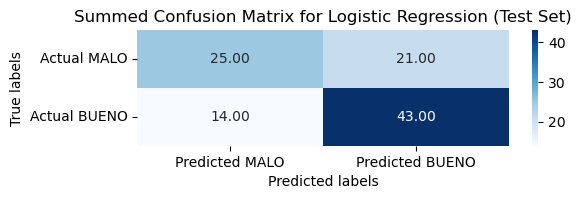


Linear SVC metrics:


C:\Users\johan\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\johan\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\johan\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\johan\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\johan\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\johan\anaconda3\L

Training Precision: 0.9989503328213006
Training Recall: 0.9989247311827956
Training F1 Score: 0.9989259889542511
Testing Precision: 0.5544660894660894
Testing Recall: 0.5263636363636363
Testing F1 Score: 0.5089144189144188


C:\Users\johan\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\johan\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\johan\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



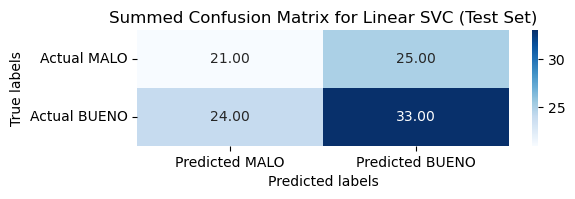


SVM with RBF kernel metrics:
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Testing Precision: 0.6349036796536797
Testing Recall: 0.6118181818181818
Testing F1 Score: 0.6065873015873016


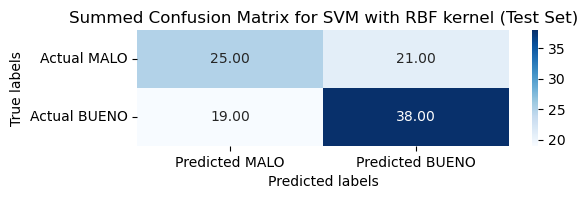


Random Forest metrics:
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Testing Precision: 0.5373440574576938
Testing Recall: 0.5645454545454546
Testing F1 Score: 0.5254629357570535


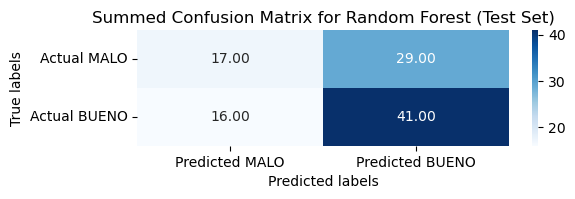


Gradient Boosting metrics:
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Testing Precision: 0.466969696969697
Testing Recall: 0.4763636363636364
Testing F1 Score: 0.4592726717726717


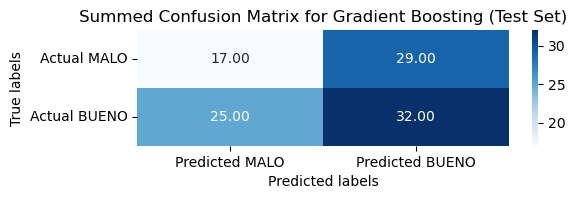

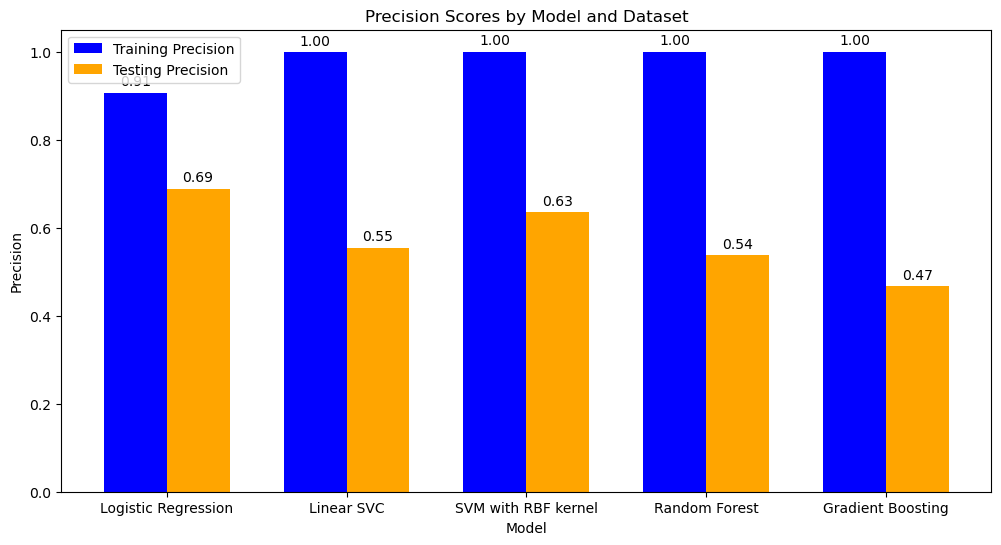

In [ ]:
# Número de K-Folds y número de árboles para los modelos de árboles
n_splits = 10
n_estimators_rf = 50
n_estimators_gb = 100

# Verificar si la columna 'Desempeño' está presente en filtered_features_models
if 'Desempeño' in filtered_features_models.columns:
    X = filtered_features_models.drop('Desempeño', axis=1)
    y = filtered_features_models['Desempeño']

    classifiers = {
        'Logistic Regression': LogisticRegression(C=5),
        'Linear SVC': LinearSVC(C=100),
        'SVM with RBF kernel': SVC(kernel='rbf', C=5),
        'Random Forest': RandomForestClassifier(n_estimators=n_estimators_rf),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=n_estimators_gb)
    }

    # Configuración de K-Folds
    kfold = StratifiedKFold(n_splits=n_splits)

    train_precisions = []
    test_precisions = []
    model_names = []

    for name, clf in classifiers.items():
        print(f"\n{name} metrics:")

        train_precision_scores = []
        train_recall_scores = []
        train_f1_scores = []

        test_precision_scores = []
        test_recall_scores = []
        test_f1_scores = []

        test_conf_matrices = np.zeros((2, 2))

        for train_index, test_index in kfold.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            clf.fit(X_train, y_train)
            y_train_pred = clf.predict(X_train)
            y_test_pred = clf.predict(X_test)

            # Evaluación de training
            train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
            train_recall = recall_score(y_train, y_train_pred, average='weighted')
            train_f1 = f1_score(y_train, y_train_pred, average='weighted')

            # Evaluación de testing
            test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
            test_recall = recall_score(y_test, y_test_pred, average='weighted')
            test_f1 = f1_score(y_test, y_test_pred, average='weighted')
            test_conf_matrix = confusion_matrix(y_test, y_test_pred, labels=['MALO', 'BUENO'])

            # Acumular resultados
            train_precision_scores.append(train_precision)
            train_recall_scores.append(train_recall)
            train_f1_scores.append(train_f1)

            test_precision_scores.append(test_precision)
            test_recall_scores.append(test_recall)
            test_f1_scores.append(test_f1)

            test_conf_matrices += test_conf_matrix

        # Promedio de métricas
        avg_train_precision = np.mean(train_precision_scores)
        avg_train_recall = np.mean(train_recall_scores)
        avg_train_f1 = np.mean(train_f1_scores)
        avg_test_precision = np.mean(test_precision_scores)
        avg_test_recall = np.mean(test_recall_scores)
        avg_test_f1 = np.mean(test_f1_scores)

        print("Training Precision:", avg_train_precision)
        print("Training Recall:", avg_train_recall)
        print("Training F1 Score:", avg_train_f1)
        print("Testing Precision:", avg_test_precision)
        print("Testing Recall:", avg_test_recall)
        print("Testing F1 Score:", avg_test_f1)

        # Guardar las precisiones para la gráfica de barras
        train_precisions.append(avg_train_precision)
        test_precisions.append(avg_test_precision)
        model_names.append(name)

        # Suma de la matriz de confusión acumulada
        summed_test_conf_matrix = test_conf_matrices

        # Visualización de la matriz de confusión sumada para el conjunto de prueba
        plt.figure(figsize=(6, 1.5))
        ax = sns.heatmap(summed_test_conf_matrix, annot=True, fmt='.2f', cmap='Blues',
                         xticklabels=['Predicted MALO', 'Predicted BUENO'],
                         yticklabels=['Actual MALO', 'Actual BUENO'])
        # Configurar las etiquetas para que estén horizontales
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title(f'Summed Confusion Matrix for {name} (Test Set)')
        plt.show()

    # Gráfica de barras para la precisión de todos los modelos
    x = np.arange(len(model_names))
    width = 0.35  # Ancho de las barras

    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, train_precisions, width, label='Training Precision', color='blue')
    bars2 = ax.bar(x + width/2, test_precisions, width, label='Testing Precision', color='orange')

    # Añadir etiquetas, título y leyenda
    ax.set_xlabel('Model')
    ax.set_ylabel('Precision')
    ax.set_title('Precision Scores by Model and Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names)
    ax.legend()

    # Añadir etiquetas de las barras
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento hacia arriba
                    textcoords="offset points",
                    ha='center', va='bottom')

    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento hacia arriba
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.show()
else:
    print("La columna 'Desempeño' no está presente en filtered_features_models.")

## Implementación de modelos utilizando embeddings

In [8]:
# Convertir las etiquetas a valores numéricos (0 para 'MALO', 1 para 'BUENO')
labels_data = df['Desempeño'].map({'MALO': 0, 'BUENO': 1})

### Seleccion de Train y test aleatorio en cada ejecucion

In [9]:
# Volver a dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(embeddings_data, labels_data, test_size=0.2)

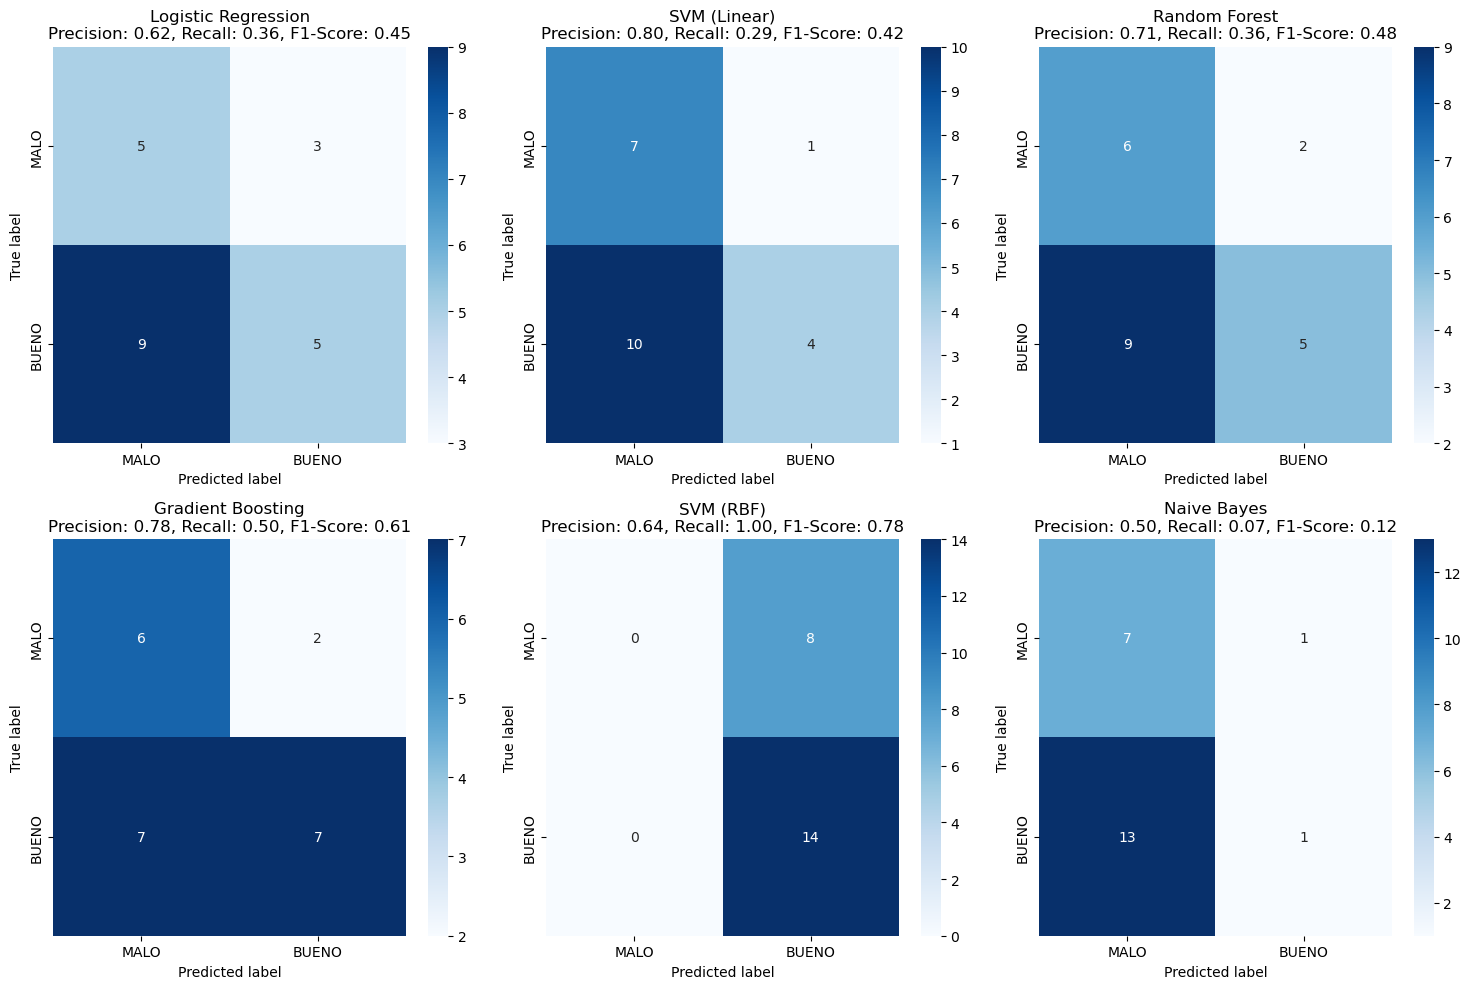

In [ ]:
# Volver a dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(embeddings_data, labels_data, test_size=0.2)

# Modelos
models = [
    LogisticRegression(),
    SVC(kernel='linear'),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(kernel='rbf'),
    GaussianNB()
]

model_names = [
    "Logistic Regression",
    "SVM (Linear)",
    "Random Forest",
    "Gradient Boosting",
    "SVM (RBF)",
    "Naive Bayes"
]

# Lista para almacenar las métricas
metrics = []

# Lista para almacenar las matrices de confusión
conf_matrices = []

# Entrenar modelos y calcular métricas
for model in models:
    model.fit(X_train, y_train)
    predictions_test = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions_test)
    conf_matrices.append(conf_matrix)
    precision = precision_score(y_test, predictions_test)
    recall = recall_score(y_test, predictions_test)
    f1 = f1_score(y_test, predictions_test)
    metrics.append((precision, recall, f1))

# Crear una figura con subgráficos para los heatmaps y métricas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Generar heatmaps y mostrar métricas para cada modelo
for i, (model_name, conf_matrix, (precision, recall, f1)) in enumerate(zip(model_names, conf_matrices, metrics)):
    row = i // 3
    col = i % 3
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[row, col])
    axes[row, col].set_title(f'{model_name}\nPrecision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')
    axes[row, col].set_xlabel('Predicted label')
    axes[row, col].set_ylabel('True label')
    axes[row, col].set_xticklabels(['MALO', 'BUENO'])
    axes[row, col].set_yticklabels(['MALO', 'BUENO'])

# Ajustar la disposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Precision promedio para cada modelo usando k-folds = 5

Logistic Regression - Average Precision: 0.5460761460761461
SVM (Linear) - Average Precision: 0.6557575757575758
Random Forest - Average Precision: 0.5733766233766234
Gradient Boosting - Average Precision: 0.5137062937062937
SVM (RBF) - Average Precision: 0.5311004784688994
Naive Bayes - Average Precision: 0.55


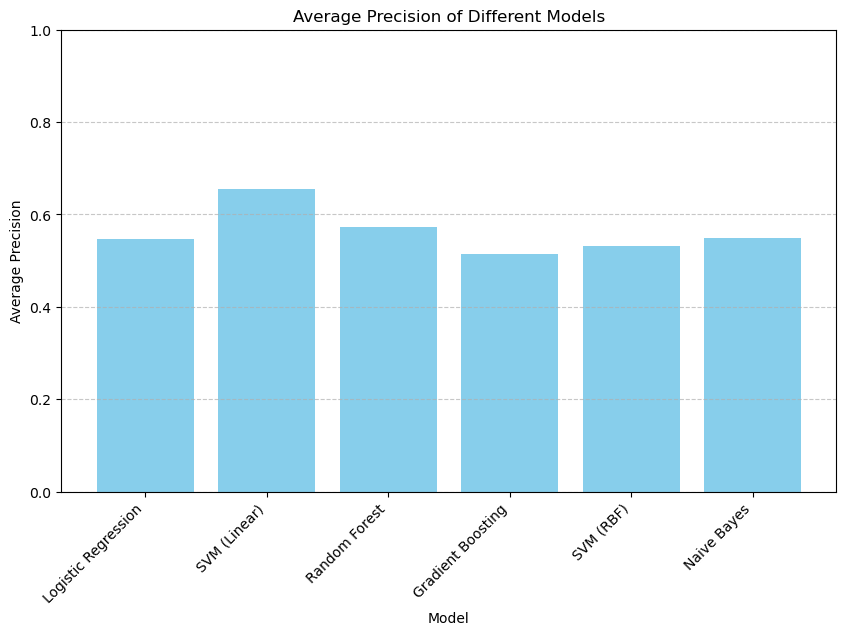

In [ ]:
from sklearn.model_selection import cross_val_score

# Lista para almacenar las precisiones promedio
avg_precisions = []

# Realizar validación cruzada para cada modelo
for model, model_name in zip(models, model_names):
    # Realizar validación cruzada con k=5
    cv_scores = cross_val_score(model, embeddings_data, labels_data, cv=5, scoring='precision')
    # Calcular la precisión promedio
    avg_precision = cv_scores.mean()
    # Almacenar la precisión promedio
    avg_precisions.append(avg_precision)
    print(f'{model_name} - Average Precision: {avg_precision}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.bar(model_names, avg_precisions, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Average Precision')
plt.title('Average Precision of Different Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)  # Limitar el rango del eje y entre 0 y 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

### CV y matrices promedio de cada modelo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

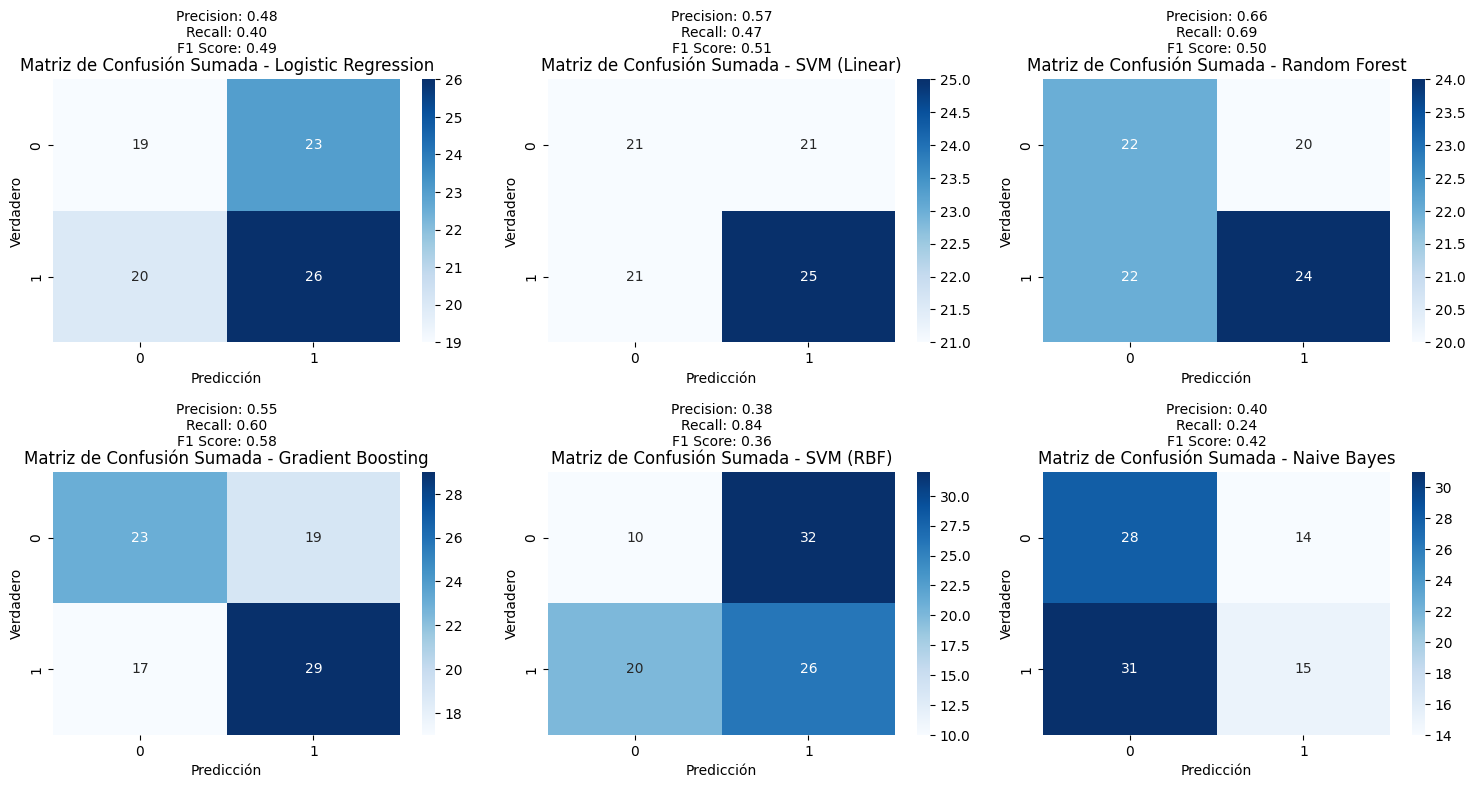

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Calcular la matriz de confusión promedio y métricas para cada modelo
X_train, X_test, y_train, y_test = train_test_split(embeddings_data, labels_data, test_size=0.2)

kf = KFold(n_splits=5, shuffle=True)

# Modelos
models = [
    LogisticRegression(),
    SVC(kernel='linear'),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(kernel='rbf'),
    GaussianNB()
]

model_names = [
    "Logistic Regression",
    "SVM (Linear)",
    "Random Forest",
    "Gradient Boosting",
    "SVM (RBF)",
    "Naive Bayes"
]

sum_conf_matrices = []
precisions = []
recalls = []
f1_scores = []

for model in models:
    # Calcular matriz de confusión promedio
    conf_matrices = []
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Entrenar el modelo
        model.fit(X_train_fold, y_train_fold)

        # Realizar predicciones en el conjunto de validación
        predictions_val_fold = model.predict(X_val_fold)

        # Calcular matriz de confusión y guardarla en la lista
        conf_matrix_fold = confusion_matrix(y_val_fold, predictions_val_fold)
        conf_matrices.append(conf_matrix_fold)

    # Calcular la matriz de confusión promedio
    sum_conf_matrix = np.sum(conf_matrices, axis=0)
    sum_conf_matrices.append(sum_conf_matrix)

    # Calcular métricas
    cv_precision = cross_val_score(model, X_train, y_train, cv=kf, scoring='precision')
    cv_recall = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall')
    cv_f1 = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')

    # Guardar las métricas promedio
    precisions.append(np.mean(cv_precision))
    recalls.append(np.mean(cv_recall))
    f1_scores.append(np.mean(cv_f1))

# Crear una figura de matplotlib con varios subgráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

for ax, conf_matrix, precision, recall, f1_score, model_name in zip(axes.flatten(), sum_conf_matrices, precisions, recalls, f1_scores, model_names):
    # Mostrar la matriz de confusión promedio como un heatmap
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)

    # Ajustar los márgenes y rotar las etiquetas de los ejes
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Verdadero')
    ax.set_title(f'Matriz de Confusión Sumada - {model_name}')

    # Agregar métricas como texto en el subplot
    ax.text(0.5, 1.1, f'Precision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1_score:.2f}', transform=ax.transAxes, ha='center')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### Entrenamiento del modelo con todos los datos

Logistic Regression - Precision: 0.83, Recall: 0.88, F1-Score: 0.85
SVM (Linear) - Precision: 0.87, Recall: 0.78, F1-Score: 0.82
Random Forest - Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Gradient Boosting - Precision: 1.00, Recall: 1.00, F1-Score: 1.00
SVM (RBF) - Precision: 0.55, Recall: 1.00, F1-Score: 0.71
Naive Bayes - Precision: 0.65, Recall: 0.33, F1-Score: 0.44


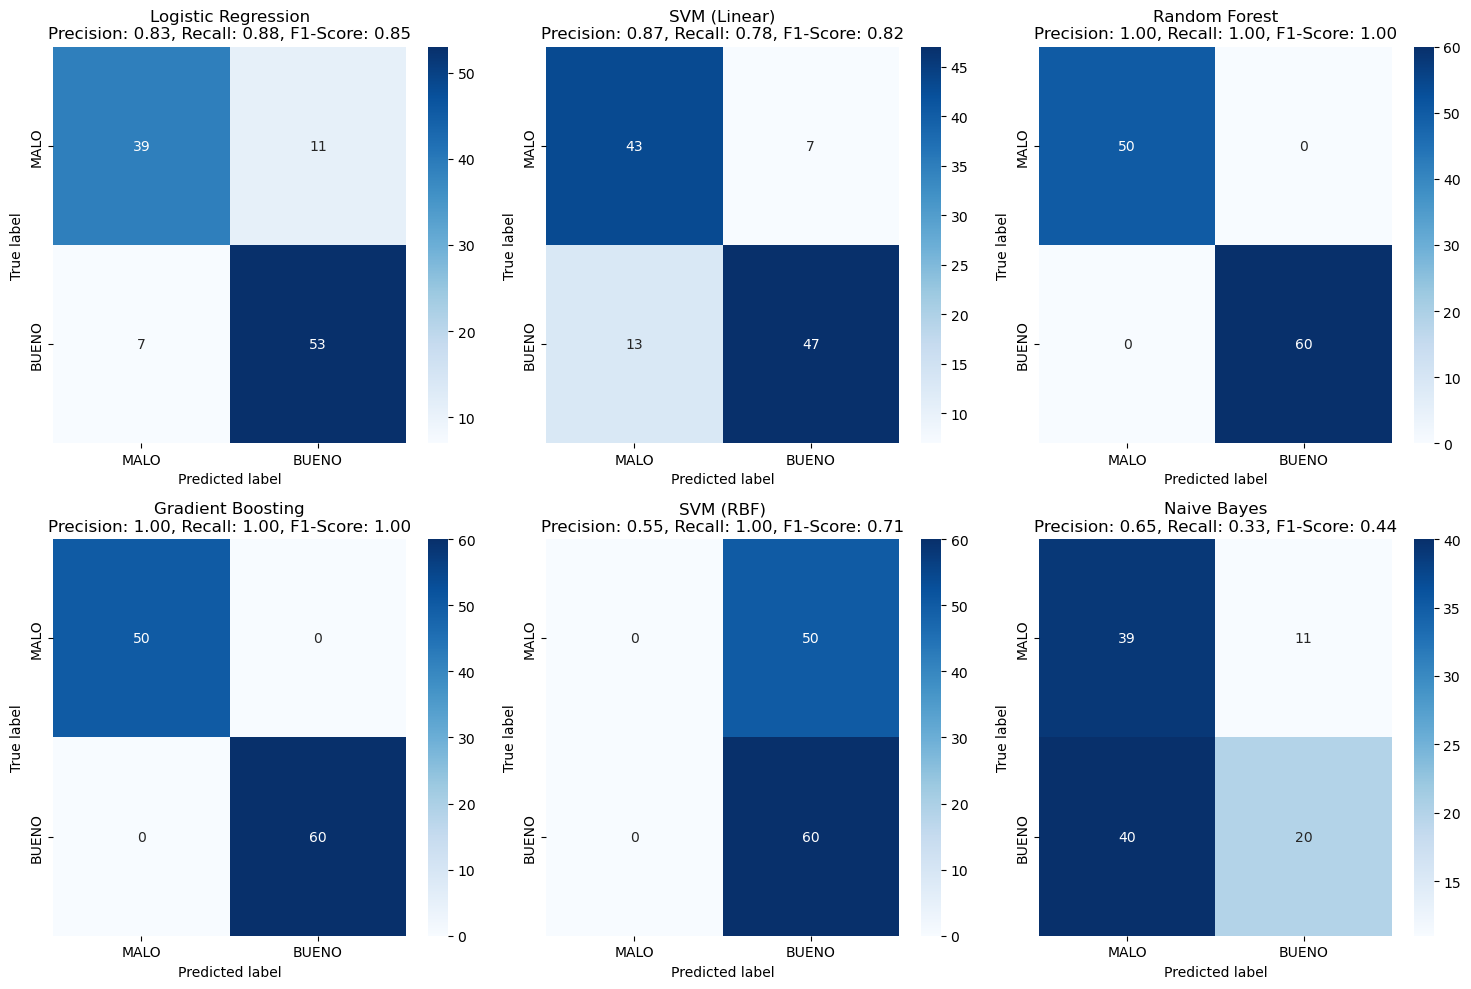

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Modelos
models = [
    LogisticRegression(),
    SVC(kernel='linear'),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    SVC(kernel='rbf'),
    GaussianNB()
]

model_names = [
    "Logistic Regression",
    "SVM (Linear)",
    "Random Forest",
    "Gradient Boosting",
    "SVM (RBF)",
    "Naive Bayes"
]

# Lista para almacenar las matrices de confusión
conf_matrices = []

# Lista para almacenar las métricas
metrics = []

# Entrenar modelos y calcular métricas
for model, model_name in zip(models, model_names):
    # Entrenar el modelo con todos los datos
    model.fit(embeddings_data, labels_data)
    # Realizar predicciones
    predictions = model.predict(embeddings_data)
    # Calcular matriz de confusión
    conf_matrix = confusion_matrix(labels_data, predictions)
    # Almacenar la matriz de confusión
    conf_matrices.append(conf_matrix)
    # Calcular métricas
    precision = precision_score(labels_data, predictions)
    recall = recall_score(labels_data, predictions)
    f1 = f1_score(labels_data, predictions)
    # Almacenar las métricas
    metrics.append((precision, recall, f1))
    # Imprimir métricas
    print(f'{model_name} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')

# Crear una figura con subgráficos para los heatmaps y métricas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Generar heatmaps y mostrar métricas para cada modelo
for i, (model_name, conf_matrix, (precision, recall, f1)) in enumerate(zip(model_names, conf_matrices, metrics)):
    row = i // 3
    col = i % 3
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[row, col])
    axes[row, col].set_title(f'{model_name}\nPrecision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')
    axes[row, col].set_xlabel('Predicted label')
    axes[row, col].set_ylabel('True label')
    axes[row, col].set_xticklabels(['MALO', 'BUENO'])
    axes[row, col].set_yticklabels(['MALO', 'BUENO'])

# Ajustar la disposición
plt.tight_layout()

# Mostrar el gráfico
plt.show();